# Previsão climatica utilizando Redes Neurais Recorrentes

## Aluno: Lucas Silva Lima

##### Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN

2024-06-11 01:31:50.627839: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-11 01:31:52.278509: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Desenvolvimento e Questões

- ### 1) Baixe o dataset [Jena Climate](https://www.kaggle.com/datasets/mnassribjena-climate).

In [2]:
data = pd.read_csv('../data/jena_climate_2009_2016.csv', index_col="Date Time")
data.index = pd.to_datetime(data.index)

### Análise exploratória

In [3]:
data.head(10)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
2009-01-01 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
2009-01-01 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420551 entries, 2009-01-01 00:10:00 to 2017-01-01 00:00:00
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p (mbar)         420551 non-null  float64
 1   T (degC)         420551 non-null  float64
 2   Tpot (K)         420551 non-null  float64
 3   Tdew (degC)      420551 non-null  float64
 4   rh (%)           420551 non-null  float64
 5   VPmax (mbar)     420551 non-null  float64
 6   VPact (mbar)     420551 non-null  float64
 7   VPdef (mbar)     420551 non-null  float64
 8   sh (g/kg)        420551 non-null  float64
 9   H2OC (mmol/mol)  420551 non-null  float64
 10  rho (g/m**3)     420551 non-null  float64
 11  wv (m/s)         420551 non-null  float64
 12  max. wv (m/s)    420551 non-null  float64
 13  wd (deg)         420551 non-null  float64
dtypes: float64(14)
memory usage: 48.1 MB


In [5]:
data.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


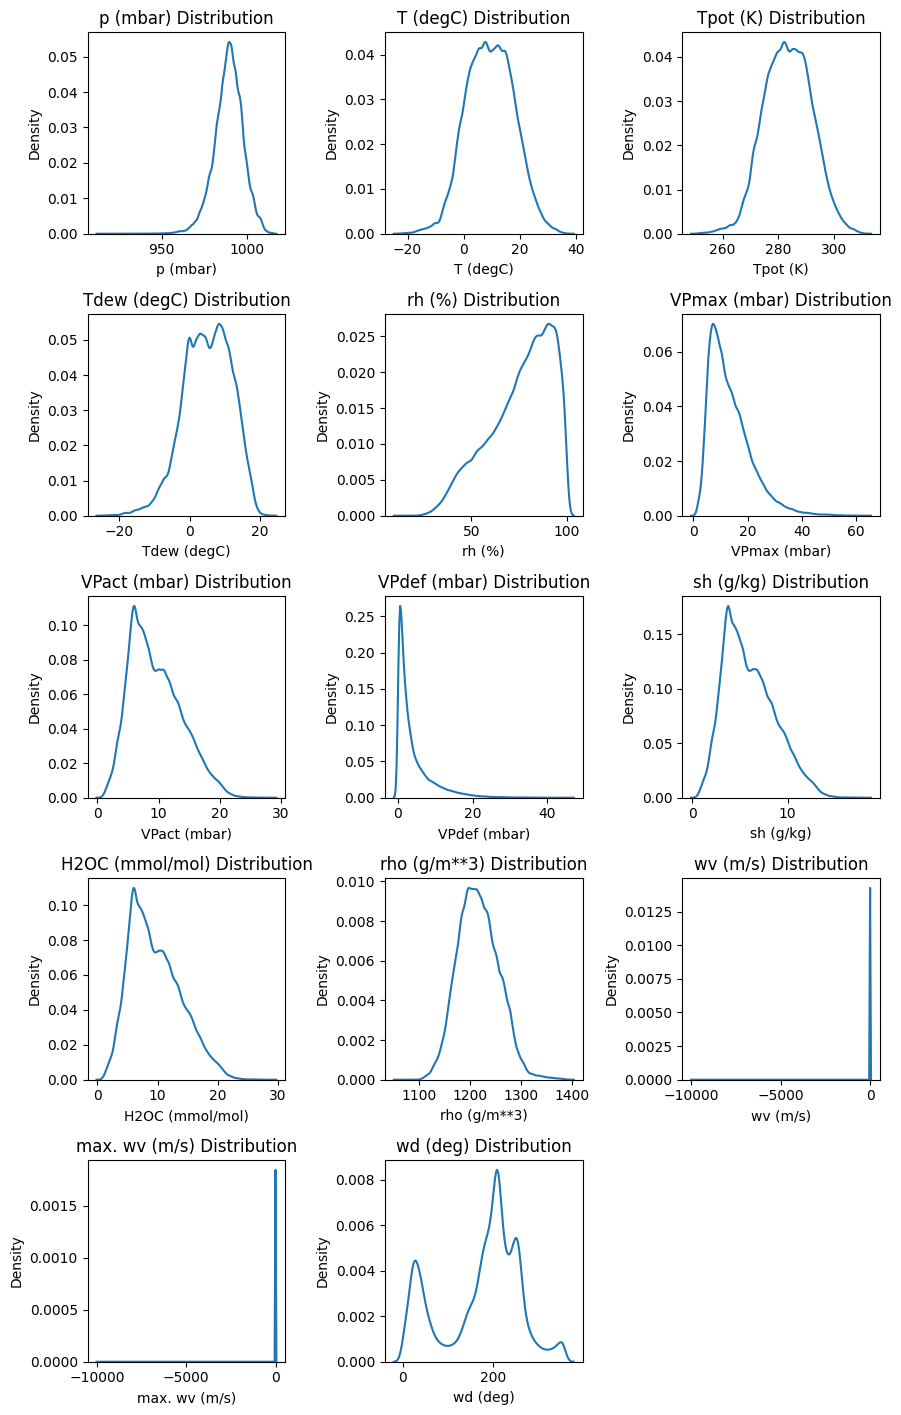

In [6]:
fig, axs = plt.subplots(5, 3, figsize=(9, 15))

for index, ax in enumerate(axs.flatten()):
    if index >= len(data.columns):
        ax.remove()
    
    else:
        sns.kdeplot(data=data, x=data.columns[index], ax=ax)
        ax.set_title(f'{data.columns[index]} Distribution')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- ### 2) Faça a indexação dos dados temporalmente e considere somente a variável Temperatura.

In [7]:
data_temperatura = data[["T (degC)"]]

In [8]:
data_temperatura.head(10)

,T (degC)
Date Time,
2009-01-01 00:10:00,-8.02
2009-01-01 00:20:00,-8.41
2009-01-01 00:30:00,-8.51
2009-01-01 00:40:00,-8.31
2009-01-01 00:50:00,-8.27
2009-01-01 01:00:00,-8.05
2009-01-01 01:10:00,-7.62
2009-01-01 01:20:00,-7.62
2009-01-01 01:30:00,-7.91


- ### 3) Particione a base de dados sendo 80% dos dados para treinar, 15% para validar e 5% para testar. (Lembre-se de manter a sequencia temporal, ou seja, configure shuffle = 0).

##### Transformação

In [9]:
t_mean = float(data_temperatura.mean())
t_std = float(data_temperatura.std())

data_temperatura = (data_temperatura - t_mean)/t_std

##### Train test split

In [10]:
train, _temp = train_test_split(data_temperatura, test_size=0.2, shuffle=False)
val, test = train_test_split(_temp, test_size=0.25, shuffle=False)

scaled_train = train.values
scaled_val = val.values
scaled_test = test.values

In [11]:
timesteps_input = 120
timesteps_output = 6
epochs = 10

In [12]:
X_train, y_train = [], []

for i in range(timesteps_input, len(scaled_train) - timesteps_output):
    X_train.append(scaled_train[i-timesteps_input:i, :])
    y_train.append(scaled_train[i: i+timesteps_output, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)

In [13]:
X_val, y_val = [], []

for i in range(timesteps_input, len(scaled_val) - timesteps_output):
    X_val.append(scaled_val[i-timesteps_input:i, :])
    y_val.append(scaled_val[i: i+timesteps_output, 0])

X_val = np.array(X_val)
y_val = np.array(y_val)

In [14]:
X_test, y_test = [], []

for i in range(timesteps_input, len(scaled_test) - timesteps_output):
    X_test.append(scaled_test[i-timesteps_input:i, :])
    y_test.append(scaled_test[i: i+timesteps_output, 0])

X_test = np.array(X_test)
y_test = np.array(y_test)

- ### 4) Implemente uma rede recorrente do tipo LSTM ou GRU capaz de receber a série temporal da variável temperatura e prever a temperatura da próxima hora.

##### Modelo

In [15]:
def build_model(timesteps_input, features, timesteps_output, unit_memory=128, activation='relu', dropout=0, optimizer='adam', loss='mse'):
    
    model = Sequential()
    model.add(LSTM(unit_memory, activation='tanh', input_shape=(timesteps_input, features), return_sequences=False))
    model.add(Dense(64, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(32, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(timesteps_output, activation='linear'))

    model.compile(optimizer=optimizer, loss=loss)
    
    return model

##### Callbacks

In [16]:
earlyStopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    mode='min',
    verbose=1,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    verbose=1,
    mode='min'
)

In [17]:
model = build_model(timesteps_input=120, features=1, timesteps_output=6) # 6 * 10  = 60 min

2024-06-11 01:33:08.911199: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-11 01:33:08.973800: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-11 01:33:08.973885: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-11 01:33:08.976255: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-11 01:33:08.976423: I tensorflow/compile

##### Treinamento

In [18]:
history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    validation_data=(X_val, y_val),
    validation_batch_size=128,
    epochs=epochs,
    callbacks=[earlyStopping, reduce_lr, TerminateOnNaN()],
    verbose=1)

Epoch 1/10


2024-06-11 01:33:18.072534: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8902
2024-06-11 01:33:20.806864: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-06-11 01:33:20.820773: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f006f36dbb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-11 01:33:20.820821: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2024-06-11 01:33:20.827186: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-11 01:33:20.949586: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-11 01:33:21.08673

2628/2628 [==============================] - 79s 26ms/step - loss: 0.0104 - val_loss: 0.0050 - lr: 0.0010
Epoch 2/10
2628/2628 [==============================] - 64s 24ms/step - loss: 0.0042 - val_loss: 0.0045 - lr: 0.0010
Epoch 3/10
2628/2628 [==============================] - 64s 24ms/step - loss: 0.0041 - val_loss: 0.0043 - lr: 0.0010
Epoch 4/10
2628/2628 [==============================] - 62s 23ms/step - loss: 0.0040 - val_loss: 0.0043 - lr: 0.0010
Epoch 5/10
2628/2628 [==============================] - 61s 23ms/step - loss: 0.0039 - val_loss: 0.0040 - lr: 0.0010
Epoch 6/10
2628/2628 [==============================] - 62s 23ms/step - loss: 0.0039 - val_loss: 0.0040 - lr: 0.0010
Epoch 7/10
2628/2628 [==============================] - 62s 23ms/step - loss: 0.0038 - val_loss: 0.0041 - lr: 0.0010
Epoch 8/10
2628/2628 [==============================] - 63s 24ms/step - loss: 0.0038 - val_loss: 0.0042 - lr: 0.0010
Epoch 9/10
2628/2628 [==============================] - 62s 24ms/step - los

##### Avaliação

In [19]:
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=True)
print(f"RMSE: {rmse}")

654/654 [==============================] - 7s 9ms/step
RMSE: 0.0031000090810477357


##### Visualização

In [20]:
def print_samples(y_test, y_pred, test=test, timesteps_input=timesteps_input, timesteps_output=timesteps_output, t_mean=t_mean, t_std=t_std):
    fig, axs = plt.subplots(3, 5, figsize=(9, 5))

    lines, labels = [], []

    for i, ax in enumerate(axs.flatten()):
        rand = np.random.randint(0, len(y_test))
        l1 = sns.lineplot(x=test.index[timesteps_input+rand : timesteps_input+rand+timesteps_output], y=y_test[rand] * t_std + t_mean, ax=ax, label="Actual" if i == 0 else "")
        l2 = sns.lineplot(x=test.index[timesteps_input+rand : timesteps_input+rand+timesteps_output], y=y_pred[rand] * t_std + t_mean, ax=ax, label="Predicted" if i == 0 else "")

        if i == 0:
            lines.extend(l1.get_lines() + l2.get_lines())
            labels.extend([l.get_label() for l in lines])

        ax.set_xlabel('')
        ax.set_xticks([])

    fig.suptitle('Comparison of Actual and Predicted Temperatures')
    plt.tight_layout(rect=[0, 0, 1, 0.95])


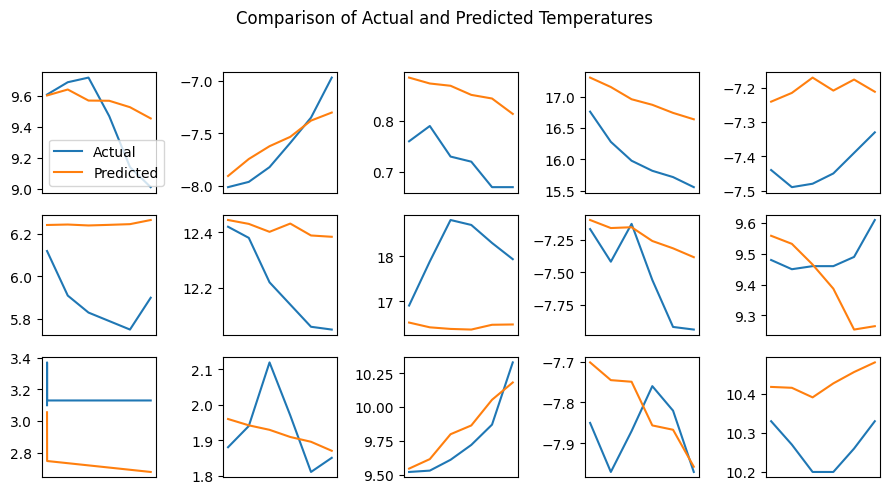

In [21]:
print_samples(y_test, y_pred)

- ### 5) Varie os parâmetros da rede e verifique quais impactos são causados no erro de predição da temperatura na base de teste. Considere:

- #### 5.1) Número de unidades de memórias da LSTM/GRU

##### Modelo

In [22]:
model = build_model(timesteps_input=120, features=1, timesteps_output=6, unit_memory=64) # 6 * 10  = 60 min

##### Treinamento

In [23]:
history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    validation_data=(X_val, y_val),
    validation_batch_size=128,
    epochs=epochs,
    callbacks=[earlyStopping, reduce_lr, TerminateOnNaN()],
    verbose=1)

Epoch 1/10
2628/2628 [==============================] - 66s 24ms/step - loss: 0.0135 - val_loss: 0.0046 - lr: 0.0010
Epoch 2/10
2628/2628 [==============================] - 66s 25ms/step - loss: 0.0042 - val_loss: 0.0047 - lr: 0.0010
Epoch 3/10
2628/2628 [==============================] - 66s 25ms/step - loss: 0.0041 - val_loss: 0.0047 - lr: 0.0010
Epoch 4/10
2628/2628 [==============================] - 65s 25ms/step - loss: 0.0040 - val_loss: 0.0042 - lr: 0.0010
Epoch 5/10
2628/2628 [==============================] - 63s 24ms/step - loss: 0.0040 - val_loss: 0.0045 - lr: 0.0010
Epoch 6/10
2628/2628 [==============================] - 63s 24ms/step - loss: 0.0039 - val_loss: 0.0040 - lr: 0.0010
Epoch 7/10
2628/2628 [==============================] - 66s 25ms/step - loss: 0.0039 - val_loss: 0.0040 - lr: 0.0010
Epoch 8/10
2628/2628 [==============================] - 67s 25ms/step - loss: 0.0039 - val_loss: 0.0040 - lr: 0.0010
Epoch 9/10
2628/2628 [==============================] - 64s 24ms

##### Avaliação	

In [24]:
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=True)
print(f"RMSE: {rmse}")

654/654 [==============================] - 6s 9ms/step
RMSE: 0.00294623530944434


##### Visualização

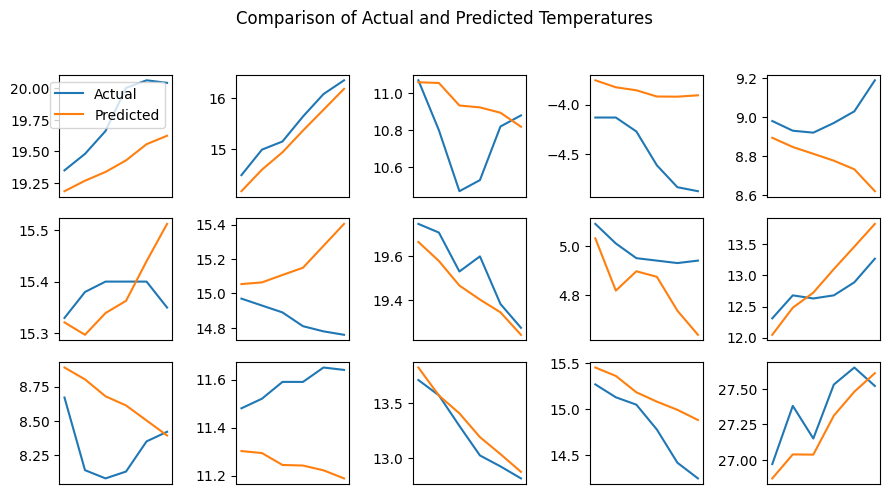

In [25]:
print_samples(y_test, y_pred)

- #### 5.2) Inserir camadas de Dropout


##### Modelo

In [26]:
model = build_model(timesteps_input=120, features=1, timesteps_output=6, dropout=0.05) # 6 * 10  = 60 min

##### Treinamento

In [27]:
history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    validation_data=(X_val, y_val),
    validation_batch_size=128,
    epochs=epochs,
    callbacks=[earlyStopping, reduce_lr, TerminateOnNaN()],
    verbose=1)

Epoch 1/10
2628/2628 [==============================] - 71s 26ms/step - loss: 0.0215 - val_loss: 0.0053 - lr: 0.0010
Epoch 2/10
2628/2628 [==============================] - 65s 25ms/step - loss: 0.0103 - val_loss: 0.0048 - lr: 0.0010
Epoch 3/10
2628/2628 [==============================] - 67s 25ms/step - loss: 0.0092 - val_loss: 0.0076 - lr: 0.0010
Epoch 4/10
2628/2628 [==============================] - 66s 25ms/step - loss: 0.0088 - val_loss: 0.0050 - lr: 0.0010
Epoch 5/10
2628/2628 [==============================] - 65s 25ms/step - loss: 0.0087 - val_loss: 0.0051 - lr: 0.0010
Epoch 6/10
2628/2628 [==============================] - 68s 26ms/step - loss: 0.0086 - val_loss: 0.0046 - lr: 0.0010
Epoch 7/10
2628/2628 [==============================] - 63s 24ms/step - loss: 0.0084 - val_loss: 0.0044 - lr: 0.0010
Epoch 8/10
2628/2628 [==============================] - 64s 25ms/step - loss: 0.0084 - val_loss: 0.0051 - lr: 0.0010
Epoch 9/10
2628/2628 [==============================] - 65s 25ms

##### Avaliação

In [28]:
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=True)
print(f"RMSE: {rmse}")

654/654 [==============================] - 7s 9ms/step
RMSE: 0.003848369112630904


##### Vizualização

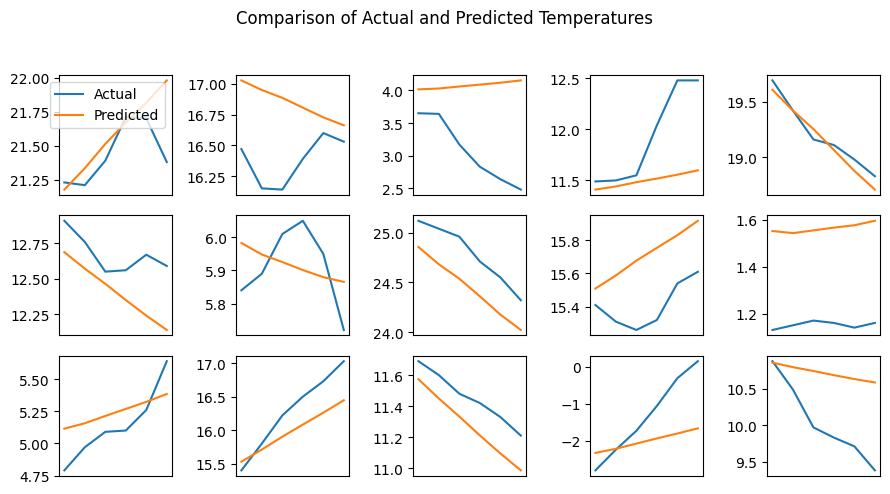

In [29]:
print_samples(y_test, y_pred)

- #### 5.3) Técnicas de otimização

##### Modelo

In [30]:
model = build_model(timesteps_input=120, features=1, timesteps_output=6, optimizer='sgd') # 6 * 10  = 60 min

##### Treinamento

In [31]:
history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    validation_data=(X_val, y_val),
    validation_batch_size=128,
    epochs=epochs,
    callbacks=[earlyStopping, reduce_lr, TerminateOnNaN()],
    verbose=1)

Epoch 1/10
2628/2628 [==============================] - 63s 23ms/step - loss: 0.0643 - val_loss: 0.0094 - lr: 0.0100
Epoch 2/10
2628/2628 [==============================] - 59s 23ms/step - loss: 0.0080 - val_loss: 0.0078 - lr: 0.0100
Epoch 3/10
2628/2628 [==============================] - 67s 26ms/step - loss: 0.0071 - val_loss: 0.0072 - lr: 0.0100
Epoch 4/10
2628/2628 [==============================] - 61s 23ms/step - loss: 0.0067 - val_loss: 0.0068 - lr: 0.0100
Epoch 5/10
2628/2628 [==============================] - 59s 22ms/step - loss: 0.0064 - val_loss: 0.0066 - lr: 0.0100
Epoch 6/10
2628/2628 [==============================] - 55s 21ms/step - loss: 0.0062 - val_loss: 0.0064 - lr: 0.0100
Epoch 7/10
2628/2628 [==============================] - 57s 22ms/step - loss: 0.0061 - val_loss: 0.0063 - lr: 0.0100
Epoch 8/10
2628/2628 [==============================] - 57s 22ms/step - loss: 0.0060 - val_loss: 0.0062 - lr: 0.0100
Epoch 9/10
2628/2628 [==============================] - 55s 21ms

##### Avaliação

In [32]:
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=True)
print(f"RMSE: {rmse}")

654/654 [==============================] - 6s 9ms/step
RMSE: 0.004744072813446195


##### Visualização

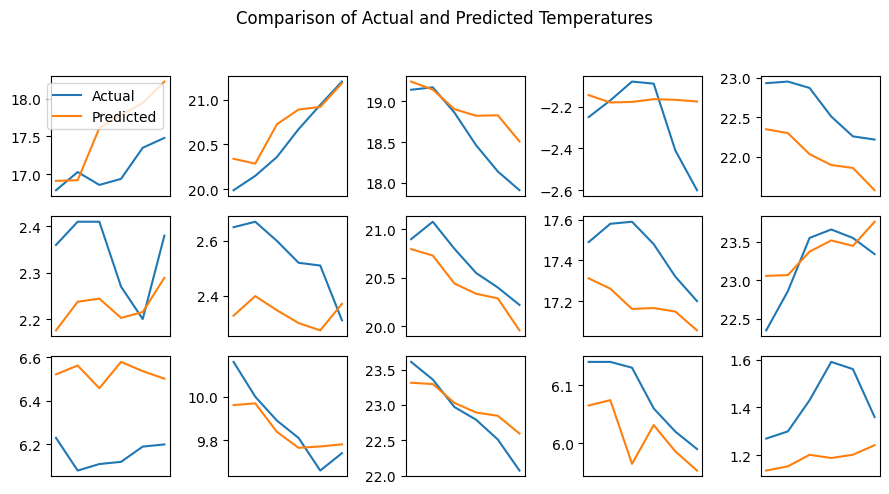

In [33]:
print_samples(y_test, y_pred)

- #### 5.4) Função de perda

##### Modelo

In [34]:
model = build_model(timesteps_input=120, features=1, timesteps_output=6, loss='mae') # 6 * 10  = 60 min

##### Treinamento

In [35]:
history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    validation_data=(X_val, y_val),
    validation_batch_size=128,
    epochs=epochs,
    callbacks=[earlyStopping, reduce_lr, TerminateOnNaN()],
    verbose=1)

Epoch 1/10
2628/2628 [==============================] - 61s 22ms/step - loss: 0.0502 - val_loss: 0.0425 - lr: 0.0010
Epoch 2/10
2628/2628 [==============================] - 59s 22ms/step - loss: 0.0402 - val_loss: 0.0401 - lr: 0.0010
Epoch 3/10
2628/2628 [==============================] - 64s 24ms/step - loss: 0.0395 - val_loss: 0.0412 - lr: 0.0010
Epoch 4/10
2628/2628 [==============================] - 59s 22ms/step - loss: 0.0393 - val_loss: 0.0418 - lr: 0.0010
Epoch 5/10
2628/2628 [==============================] - 55s 21ms/step - loss: 0.0390 - val_loss: 0.0398 - lr: 0.0010
Epoch 6/10
2628/2628 [==============================] - 58s 22ms/step - loss: 0.0388 - val_loss: 0.0407 - lr: 0.0010
Epoch 7/10
2628/2628 [==============================] - 65s 25ms/step - loss: 0.0386 - val_loss: 0.0406 - lr: 0.0010
Epoch 8/10
2628/2628 [==============================] - 76s 29ms/step - loss: 0.0384 - val_loss: 0.0400 - lr: 0.0010
Epoch 9/10
2628/2628 [==============================] - 68s 26ms

##### Avaliação

In [36]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=True)
print(f"RMSE: {rmse}\nMAE: {mae}")

654/654 [==============================] - 7s 9ms/step
RMSE: 0.0029949872532582258
MAE: 0.03495131770088255


##### Visualização

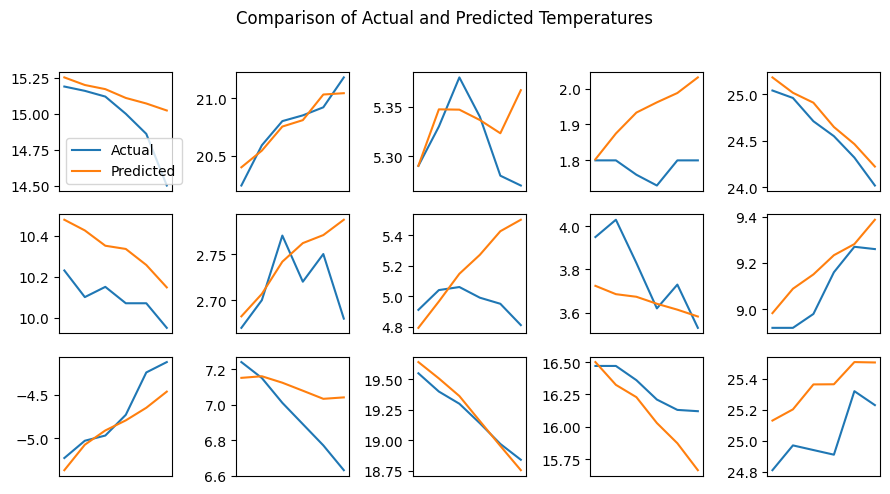

In [37]:
print_samples(y_test, y_pred)

- ### 6) Altere o janelamento de amostras passadas usadas para a predição. O que acontece com a precisão da predicão na base de teste?

##### Tomando por base a RMSE (Root Mean Squared Error) obtida para janelamento de amostras de 60, 120 e 240 timesteps (10 minutos cada) de 0.00310, 0.00304 e 0.00295 respectivamente, observa-se que a qualidade da predição na base de teste aumenta conforme o aumento do janelamento de amostras passadas usadas para a predição.

- #### 6.1) Janelamento de 60 amostras

##### Preparação dos dados

In [38]:
timesteps_input_60 = 60

X_train_60, y_train_60 = [], []

for i in range(timesteps_input_60, len(scaled_train) - timesteps_output):
    X_train_60.append(scaled_train[i-timesteps_input_60:i, :])
    y_train_60.append(scaled_train[i: i+timesteps_output, 0])

X_train_60 = np.array(X_train_60)
y_train_60 = np.array(y_train_60)

X_val_60, y_val_60 = [], []

for i in range(timesteps_input_60, len(scaled_val) - timesteps_output):
    X_val_60.append(scaled_val[i-timesteps_input_60:i, :])
    y_val_60.append(scaled_val[i: i+timesteps_output, 0])

X_val_60 = np.array(X_val_60)
y_val_60 = np.array(y_val_60)

X_test_60, y_test_60 = [], []

for i in range(timesteps_input_60, len(scaled_test) - timesteps_output):
    X_test_60.append(scaled_test[i-timesteps_input_60:i, :])
    y_test_60.append(scaled_test[i: i+timesteps_output, 0])

X_test_60 = np.array(X_test_60)
y_test_60 = np.array(y_test_60)

In [39]:
# Modelo
model = build_model(timesteps_input=60, features=1, timesteps_output=6) # 6 * 10  = 60 min

# Treinamento
history = model.fit(
    X_train_60,
    y_train_60,
    batch_size=128,
    validation_data=(X_val_60, y_val_60),
    validation_batch_size=128,
    epochs=epochs,
    callbacks=[earlyStopping, reduce_lr, TerminateOnNaN()],
    verbose=1)

# Avaliação
y_pred = model.predict(X_test_60)
rmse = mean_squared_error(y_test_60, y_pred, squared=True)
print(f"RMSE: {rmse}")

Epoch 1/10
2628/2628 [==============================] - 51s 18ms/step - loss: 0.0113 - val_loss: 0.0049 - lr: 0.0010
Epoch 2/10
2628/2628 [==============================] - 46s 18ms/step - loss: 0.0044 - val_loss: 0.0046 - lr: 0.0010
Epoch 3/10
2628/2628 [==============================] - 45s 17ms/step - loss: 0.0043 - val_loss: 0.0045 - lr: 0.0010
Epoch 4/10
2628/2628 [==============================] - 48s 18ms/step - loss: 0.0042 - val_loss: 0.0044 - lr: 0.0010
Epoch 5/10
2628/2628 [==============================] - 48s 18ms/step - loss: 0.0042 - val_loss: 0.0043 - lr: 0.0010
Epoch 6/10
2628/2628 [==============================] - 47s 18ms/step - loss: 0.0041 - val_loss: 0.0043 - lr: 0.0010
Epoch 7/10
2628/2628 [==============================] - 46s 17ms/step - loss: 0.0041 - val_loss: 0.0043 - lr: 0.0010
Epoch 8/10
2628/2628 [==============================] - 47s 18ms/step - loss: 0.0041 - val_loss: 0.0043 - lr: 0.0010
Epoch 9/10
2628/2628 [==============================] - ETA: 0s 

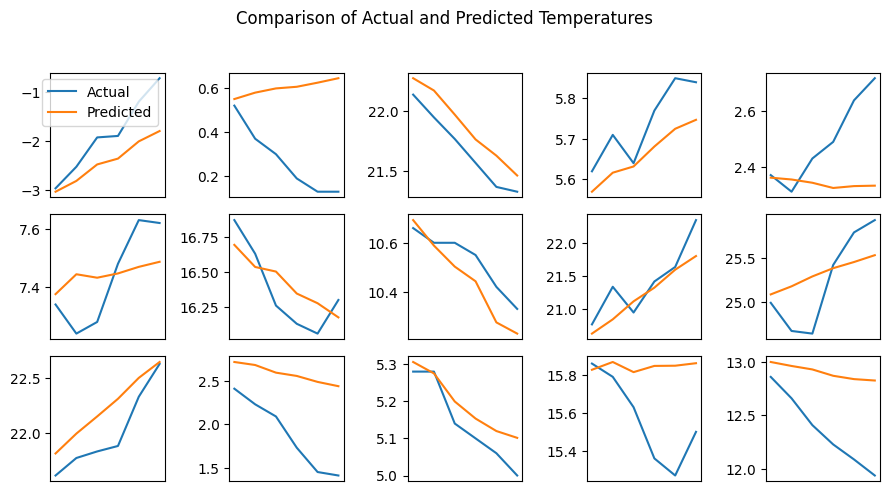

In [40]:
print_samples(y_test_60, y_pred, timesteps_input=timesteps_input_60)

- #### 6.2) Janelamento de 240 amostras

##### Preparação dos dados

In [41]:
timesteps_input_240 = 240

X_train_240, y_train_240 = [], []

for i in range(timesteps_input_240, len(scaled_train) - timesteps_output):
    X_train_240.append(scaled_train[i-timesteps_input_240:i, :])
    y_train_240.append(scaled_train[i: i+timesteps_output, 0])

X_train_240 = np.array(X_train_240)
y_train_240 = np.array(y_train_240)

X_val_240, y_val_240 = [], []

for i in range(timesteps_input_240, len(scaled_val) - timesteps_output):
    X_val_240.append(scaled_val[i-timesteps_input_240:i, :])
    y_val_240.append(scaled_val[i: i+timesteps_output, 0])

X_val_240 = np.array(X_val_240)
y_val_240 = np.array(y_val_240)

X_test_240, y_test_240 = [], []

for i in range(timesteps_input_240, len(scaled_test) - timesteps_output):
    X_test_240.append(scaled_test[i-timesteps_input_240:i, :])
    y_test_240.append(scaled_test[i: i+timesteps_output, 0])

X_test_240 = np.array(X_test_240)
y_test_240 = np.array(y_test_240)

In [42]:
# Modelo
model = build_model(timesteps_input=240, features=1, timesteps_output=6) # 6 * 10  = 60 min

# Treinamento
history = model.fit(
    X_train_240,
    y_train_240,
    batch_size=128,
    validation_data=(X_val_240, y_val_240),
    validation_batch_size=128,
    epochs=epochs,
    callbacks=[earlyStopping, reduce_lr, TerminateOnNaN()],
    verbose=1)

# Avaliação
y_pred = model.predict(X_test_240)
rmse = mean_squared_error(y_test_240, y_pred, squared=True)
print(f"RMSE: {rmse}")

Epoch 1/10
2627/2627 [==============================] - 102s 37ms/step - loss: 0.0102 - val_loss: 0.0045 - lr: 0.0010
Epoch 2/10
2627/2627 [==============================] - 93s 35ms/step - loss: 0.0043 - val_loss: 0.0043 - lr: 0.0010
Epoch 3/10
2627/2627 [==============================] - 90s 34ms/step - loss: 0.0041 - val_loss: 0.0048 - lr: 0.0010
Epoch 4/10
2627/2627 [==============================] - 89s 34ms/step - loss: 0.0040 - val_loss: 0.0043 - lr: 0.0010
Epoch 5/10
2627/2627 [==============================] - 90s 34ms/step - loss: 0.0039 - val_loss: 0.0041 - lr: 0.0010
Epoch 6/10
2627/2627 [==============================] - 92s 35ms/step - loss: 0.0039 - val_loss: 0.0044 - lr: 0.0010
Epoch 7/10
2627/2627 [==============================] - 91s 35ms/step - loss: 0.0038 - val_loss: 0.0042 - lr: 0.0010
Epoch 8/10
2627/2627 [==============================] - 92s 35ms/step - loss: 0.0038 - val_loss: 0.0041 - lr: 0.0010
Epoch 9/10
2627/2627 [==============================] - 93s 35m

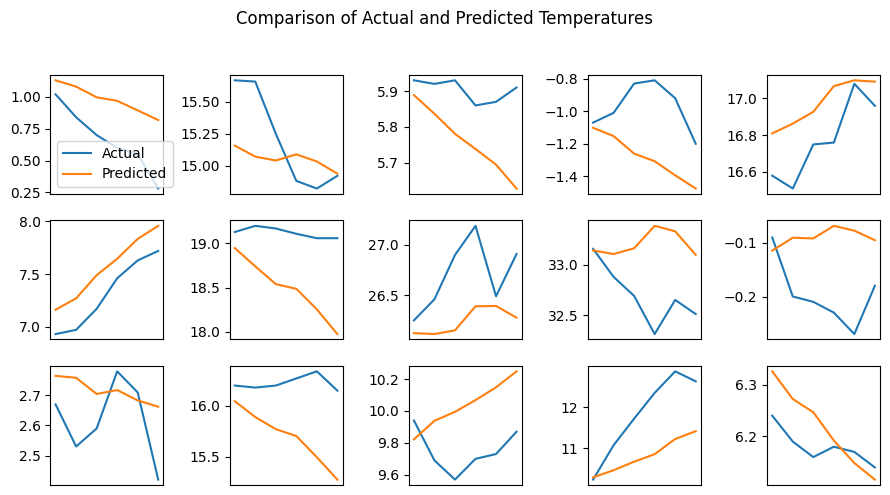

In [43]:
print_samples(y_test_240, y_pred, timesteps_input=timesteps_input_240)

- ### 7) Considere somente os dados dos anos de 2015 em diante no treinamento do modelo. Como o tamanho da base de dados afeta a predição? Com base nos resultados, como você interpreta a relação do passado histórico com a predição do valor atual da temperatura?

##### Ao limitar a base de treinamento para dados coletados a partir de 2015, observou-se uma diminuição no erro RMSE do modelo de previsão de séries temporais de temperaturas, de 0.00310 para 0.00286. Esta redução sugere que, apesar da diminuição na quantidade de dados disponíveis, o modelo ajustado aos dados mais recentes pode estar capturando efetivamente as tendências e variações mais pertinentes ao período atual. No entanto, é importante considerar que a exclusão de dados históricos mais antigos pode resultar na perda de informações sobre padrões e tendências de longo prazo.

##### Preparação dos dados

In [44]:
data_temperatura_2015 = data_temperatura[data_temperatura.index > '2015-01-01']

In [45]:
#Transformação
data_temperatura = (data_temperatura - t_mean)/t_std

#Train test split
train_2015, _temp_2015 = train_test_split(data_temperatura_2015, test_size=0.2, shuffle=False)
val_2015, test_2015 = train_test_split(_temp_2015, test_size=0.25, shuffle=False)

scaled_train_2015 = train.values
scaled_val_2015 = val.values
scaled_test_2015 = test.values

X_train_2015, y_train_2015 = [], []

for i in range(timesteps_input, len(scaled_train_2015) - timesteps_output):
    X_train_2015.append(scaled_train_2015[i-timesteps_input:i, :])
    y_train_2015.append(scaled_train_2015[i: i+timesteps_output, 0])

X_train_2015 = np.array(X_train_2015)
y_train_2015 = np.array(y_train_2015)

X_val_2015, y_val_2015 = [], []

for i in range(timesteps_input, len(scaled_val_2015) - timesteps_output):
    X_val_2015.append(scaled_val_2015[i-timesteps_input:i, :])
    y_val_2015.append(scaled_val_2015[i: i+timesteps_output, 0])

X_val_2015 = np.array(X_val_2015)
y_val_2015 = np.array(y_val_2015)

X_test_2015, y_test_2015 = [], []

for i in range(timesteps_input, len(scaled_test_2015) - timesteps_output):
    X_test_2015.append(scaled_test_2015[i-timesteps_input:i, :])
    y_test_2015.append(scaled_test_2015[i: i+timesteps_output, 0])

X_test_2015 = np.array(X_test_2015)
y_test_2015 = np.array(y_test_2015)

##### Modelo

In [46]:
model = build_model(timesteps_input=120, features=1, timesteps_output=6) # 6 * 10  = 60 min

##### Treinamento

In [47]:
history = model.fit(
    X_train_2015,
    y_train_2015,
    batch_size=128,
    validation_data=(X_val_2015, y_val_2015),
    validation_batch_size=128,
    epochs=epochs,
    callbacks=[earlyStopping, reduce_lr, TerminateOnNaN()],
    verbose=1)

Epoch 1/10
2628/2628 [==============================] - 62s 23ms/step - loss: 0.0099 - val_loss: 0.0045 - lr: 0.0010
Epoch 2/10
2628/2628 [==============================] - 59s 23ms/step - loss: 0.0042 - val_loss: 0.0046 - lr: 0.0010
Epoch 3/10
2628/2628 [==============================] - 59s 22ms/step - loss: 0.0041 - val_loss: 0.0042 - lr: 0.0010
Epoch 4/10
2628/2628 [==============================] - 59s 22ms/step - loss: 0.0040 - val_loss: 0.0043 - lr: 0.0010
Epoch 5/10
2628/2628 [==============================] - 60s 23ms/step - loss: 0.0039 - val_loss: 0.0043 - lr: 0.0010
Epoch 6/10
2628/2628 [==============================] - 59s 22ms/step - loss: 0.0039 - val_loss: 0.0043 - lr: 0.0010
Epoch 7/10
2628/2628 [==============================] - 59s 22ms/step - loss: 0.0039 - val_loss: 0.0042 - lr: 0.0010
Epoch 8/10
2628/2628 [==============================] - ETA: 0s - loss: 0.0038
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
2628/2628 [==============

##### Avaliação

In [48]:
y_pred = model.predict(X_test_2015)
rmse = mean_squared_error(y_test_2015, y_pred, squared=True)
print(f"RMSE: {rmse}")

654/654 [==============================] - 6s 9ms/step
RMSE: 0.0028641623434089267


##### Visualização

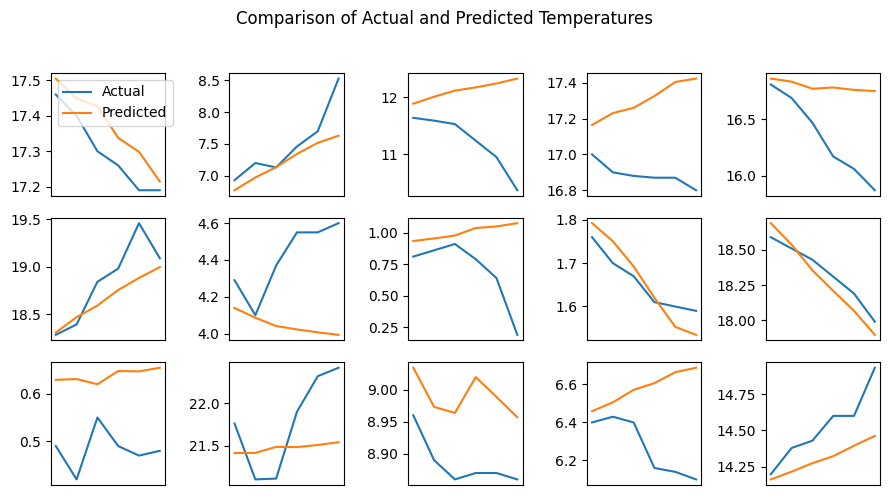

In [49]:
print_samples(y_test_2015, y_pred)

- ### 8) Altere o código para que ele seja capaz de realizar a predição da temperatura para um período maior, por exemplo, o valor da temperatura prevista para as próximas 24 horas.

##### Preparação dos dados

In [50]:
timesteps_output_24 = 6 * 24

X_train_24, y_train_24 = [], []

for i in range(timesteps_input, len(scaled_train) - timesteps_output_24):
    X_train_24.append(scaled_train[i-timesteps_input:i, :])
    y_train_24.append(scaled_train[i: i+timesteps_output_24, 0])

X_train_24 = np.array(X_train_24)
y_train_24 = np.array(y_train_24)

X_val_24, y_val_24 = [], []

for i in range(timesteps_input, len(scaled_val) - timesteps_output_24):
    X_val_24.append(scaled_val[i-timesteps_input:i, :])
    y_val_24.append(scaled_val[i: i+timesteps_output_24, 0])

X_val_24 = np.array(X_val_24)
y_val_24 = np.array(y_val_24)

X_test_24, y_test_24 = [], []

for i in range(timesteps_input, len(scaled_test) - timesteps_output_24):
    X_test_24.append(scaled_test[i-timesteps_input:i, :])
    y_test_24.append(scaled_test[i: i+timesteps_output_24, 0])

X_test_24 = np.array(X_test_24)
y_test_24 = np.array(y_test_24)

##### Modelo

In [51]:
model = build_model(timesteps_input=120, features=1, timesteps_output=6 * 24) # 10 * 6 *24 = 1440 min = 24 horas

##### Treinamento

In [52]:
history = model.fit(
    X_train_24,
    y_train_24,
    batch_size=128,
    validation_data=(X_val_24, y_val_24),
    validation_batch_size=128,
    epochs=epochs,
    callbacks=[earlyStopping, reduce_lr, TerminateOnNaN()],
    verbose=1)

Epoch 1/10
2627/2627 [==============================] - 62s 23ms/step - loss: 0.1378 - val_loss: 0.1197 - lr: 0.0010
Epoch 2/10
2627/2627 [==============================] - 60s 23ms/step - loss: 0.1057 - val_loss: 0.1167 - lr: 0.0010
Epoch 3/10
2627/2627 [==============================] - 60s 23ms/step - loss: 0.0998 - val_loss: 0.1085 - lr: 0.0010
Epoch 4/10
2627/2627 [==============================] - 59s 23ms/step - loss: 0.0958 - val_loss: 0.1056 - lr: 0.0010
Epoch 5/10
2627/2627 [==============================] - 59s 23ms/step - loss: 0.0919 - val_loss: 0.1064 - lr: 0.0010
Epoch 6/10
2627/2627 [==============================] - 59s 23ms/step - loss: 0.0872 - val_loss: 0.1122 - lr: 0.0010
Epoch 7/10
2627/2627 [==============================] - 59s 22ms/step - loss: 0.0817 - val_loss: 0.1132 - lr: 0.0010
Epoch 8/10
2627/2627 [==============================] - 60s 23ms/step - loss: 0.0761 - val_loss: 0.1142 - lr: 0.0010
Epoch 9/10
2626/2627 [============================>.] - ETA: 0s 

##### Avaliação

In [53]:
y_pred = model.predict(X_test_24)
rmse = mean_squared_error(y_test_24, y_pred, squared=True)
print(f"RMSE: {rmse}")

649/649 [==============================] - 6s 9ms/step
RMSE: 0.09494354662373712


##### Vizualização

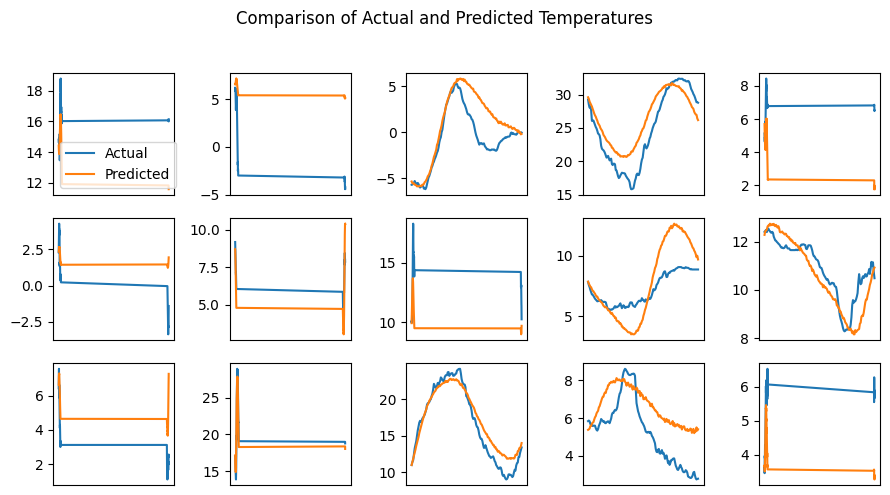

In [54]:
print_samples(y_test_24, y_pred, timesteps_output=timesteps_output_24)

- ### 9) [OPCIONAL] Considere o problema de predição multivariável, alimente a rede neural preditiva com todas as 12 variáveis e obtenha a previsão da temperatura para a hora seguinte.

##### Preparação dos dados

In [55]:
data_full = data[data.index > '2015-01-01']

In [56]:
#Train test split
train_full, _temp_full = train_test_split(data_full, test_size=0.2, shuffle=False)
val_full, test_full = train_test_split(_temp_full, test_size=0.25, shuffle=False)

#Transformação
scaler_full = StandardScaler()

scaler_full.fit(train_full)
scaled_train_full = scaler_full.transform(train_full)
scaled_val_full = scaler_full.transform(val_full)
scaled_test_full = scaler_full.transform(test_full)

X_train_full, y_train_full = [], []

for i in range(timesteps_input, len(scaled_train_full) - timesteps_output):
    X_train_full.append(scaled_train_full[i-timesteps_input:i, :])
    y_train_full.append(scaled_train_full[i: i+timesteps_output, 1])

X_train_full = np.array(X_train_full)
y_train_full = np.array(y_train_full)

X_val_full, y_val_full = [], []

for i in range(timesteps_input, len(scaled_val_full) - timesteps_output):
    X_val_full.append(scaled_val_full[i-timesteps_input:i, :])
    y_val_full.append(scaled_val_full[i: i+timesteps_output, 1])

X_val_full = np.array(X_val_full)
y_val_full = np.array(y_val_full)

X_test_full, y_test_full = [], []

for i in range(timesteps_input, len(scaled_test_full) - timesteps_output):
    X_test_full.append(scaled_test_full[i-timesteps_input:i, :])
    y_test_full.append(scaled_test_full[i: i+timesteps_output, 1])

X_test_full = np.array(X_test_full)
y_test_full = np.array(y_test_full)

##### Modelo

In [57]:
model = build_model(timesteps_input=120, features=14, timesteps_output=6) # 6 * 10  = 60 min

##### Treinamento

In [58]:
history = model.fit(
    X_train_full,
    y_train_full,
    batch_size=128,
    validation_data=(X_val_full, y_val_full),
    validation_batch_size=128,
    epochs=epochs,
    callbacks=[earlyStopping, reduce_lr, TerminateOnNaN()],
    verbose=1)

Epoch 1/10
655/655 [==============================] - 20s 26ms/step - loss: 0.0249 - val_loss: 0.0048 - lr: 0.0010
Epoch 2/10
655/655 [==============================] - 15s 24ms/step - loss: 0.0057 - val_loss: 0.0045 - lr: 0.0010
Epoch 3/10
655/655 [==============================] - 15s 23ms/step - loss: 0.0052 - val_loss: 0.0049 - lr: 0.0010
Epoch 4/10
655/655 [==============================] - 15s 23ms/step - loss: 0.0049 - val_loss: 0.0041 - lr: 0.0010
Epoch 5/10
655/655 [==============================] - 15s 23ms/step - loss: 0.0047 - val_loss: 0.0038 - lr: 0.0010
Epoch 6/10
655/655 [==============================] - 15s 23ms/step - loss: 0.0046 - val_loss: 0.0039 - lr: 0.0010
Epoch 7/10
655/655 [==============================] - 15s 23ms/step - loss: 0.0045 - val_loss: 0.0039 - lr: 0.0010
Epoch 8/10
655/655 [==============================] - 15s 23ms/step - loss: 0.0044 - val_loss: 0.0038 - lr: 0.0010
Epoch 9/10
655/655 [==============================] - 15s 23ms/step - loss: 0.00

##### Avaliação

In [59]:
y_pred = model.predict(X_test_full)
rmse = mean_squared_error(y_test_full, y_pred, squared=True)
print(f"RMSE: {rmse}")

160/160 [==============================] - 4s 10ms/step
RMSE: 0.004523532056817072


##### Visualização

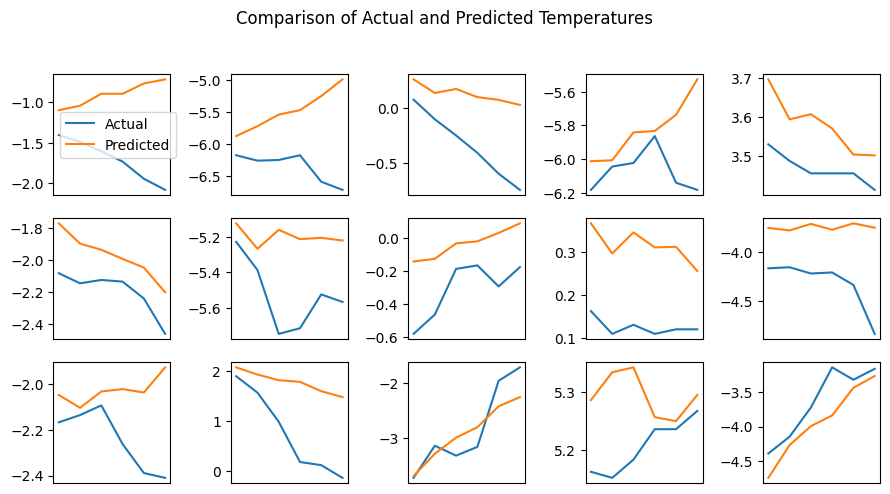

In [60]:
print_samples(y_test_full, y_pred)